# Carregamento dos dados

In [100]:
import pandas as pd

# Carregando os dados do arquivo CSV pré-processado em um DataFrame do pandas
comentarios = pd.read_csv('../Data/content_pre_processado.csv')

# Exibindo as primeiras 5 linhas do DataFrame para verificação
comentarios.head(5)

,reviewId,app_name,content,sentiment_polarity,sentiment
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,sopre razoável apesar fácil utilizar apresenta...,positive,sadness
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,otimizar fácil visualizar produto pedido rastr...,positive,sadness
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,prático fácil entender vendedor mandar produto...,positive,sadness
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo chatear fato pesquisar produto colo...,positive,sadness
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,ter dificuldade pagamento cartão crédito compr...,negative,disgust


# Extração da features (representação de texto em formato vetorial)

<p style="color:green">A seguir, faremos a instanciação do método que fará a representação do texto usando o modelo BoW.</p> 

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

# Criando uma instância do CountVectorizer
# O CountVectorizer converte uma coleção de documentos de texto em uma matriz de contagem de palavras (BoW)
# Cada entrada na matriz representa a contagem de uma palavra específica em um documento
vectorizer = CountVectorizer()

In [102]:
# Transformando o texto da coluna 'content' em uma matriz de contagem de palavras (Bag of Words)
# fit_transform: Ajusta o modelo aos dados de texto e transforma os dados em uma matriz de contagem de palavras
# BoW_matriz: Matriz onde cada linha representa um documento e cada coluna representa uma palavra, com valores de contagem
BoW_matriz = vectorizer.fit_transform(comentarios['content'])

# Convertendo a matriz de contagem de palavras em um DataFrame do pandas
# .toarray(): Converte a matriz esparsa em uma matriz densa (array)
# vectorizer.get_feature_names_out(): Obtém os nomes das características (palavras) para usar como colunas do DataFrame
# BOW_dataframe: DataFrame onde cada linha representa um documento e cada coluna representa uma palavra, com contagens de palavras
BOW_dataframe = pd.DataFrame(BoW_matriz.toarray(), columns=vectorizer.get_feature_names_out())

# Exibindo o DataFrame para verificar a transformação
BOW_dataframe

,aba,abaixar,abaixe,abaixei,abaixeir,abaixem,abaixo,abalar,abandonar,abandonei,...,ótimo,ótimol,ótimos,ótir,última,últimar,último,único,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Treinamento e teste

<p style="color:green">Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (BOW_dataframe) em um conjunto de teste e outro treinamento. </p>

In [103]:
# Categoria a serem previstas
categorias = comentarios[['sentiment_polarity', 'sentiment']]

In [104]:
from sklearn.model_selection import train_test_split

# Dividindo o conjunto de dados em conjuntos de treino e teste
# test_size=0.2: 20% dos dados serão usados para teste, e o restante para treino.
X_train, X_test, y_train, y_test = train_test_split(BOW_dataframe, categorias, test_size=0.2)

# Extraindo as colunas 'sentiment_polarity' e 'sentiment' dos conjuntos de treino e teste
y_train_polarity = y_train['sentiment_polarity']
y_test_polarity = y_test['sentiment_polarity']
y_train_sentiment = y_train['sentiment']
y_test_sentiment = y_test['sentiment']


In [105]:
from sklearn.neighbors import KNeighborsClassifier

# Criando e treinando um classificador K-Nearest Neighbors (KNN) para prever a polaridade do sentimento
# n_neighbors=5: O número de vizinhos a considerar ao classificar um novo ponto
knn_polarity = KNeighborsClassifier(n_neighbors=5)
knn_polarity.fit(X_train, y_train_polarity)

# Fazendo previsões sobre o conjunto de teste para polaridade do sentimento
predicoes_polarity = knn_polarity.predict(X_test)

# Criando e treinando um classificador K-Nearest Neighbors (KNN) para prever o sentimento
# n_neighbors=5: O número de vizinhos a considerar ao classificar um novo ponto
knn_sentiment = KNeighborsClassifier(n_neighbors=5)
knn_sentiment.fit(X_train, y_train_sentiment)

# Fazendo previsões sobre o conjunto de teste para sentimento
predicoes_sentiment = knn_sentiment.predict(X_test)

In [106]:
from sklearn.metrics import classification_report

# Avaliando o desempenho do classificador KNN para a previsão do sentimento
print("\nAvaliação para 'sentiment':")
print(classification_report(y_test_sentiment, predicoes_sentiment))


Avaliação para 'sentiment':
              precision    recall  f1-score   support

       anger       0.45      0.49      0.47       162
     disgust       0.45      0.28      0.34       181
        fear       0.00      0.00      0.00         5
   happiness       0.18      0.66      0.28        59
     neutral       0.04      0.23      0.07        13
     sadness       0.71      0.11      0.19       181
    surprise       0.00      0.00      0.00         1

    accuracy                           0.32       602
   macro avg       0.26      0.25      0.19       602
weighted avg       0.49      0.32      0.32       602



c:\Users\dougl\OneDrive\Desktop\Mineracao_Textos\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\Mineracao_Textos\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\Mineracao_Textos\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

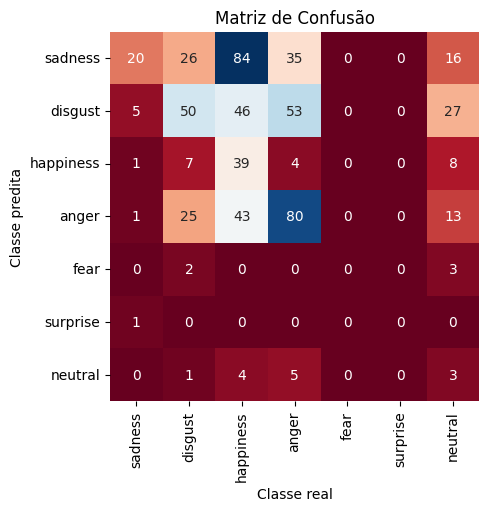

In [107]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo os rótulos únicos para o sentimento, que serão usados nos eixos da matriz de confusão
sentiment_labels = comentarios['sentiment'].unique()

# Calculando a matriz de confusão
# y_test_sentiment: Rótulos reais dos dados de teste para o sentimento
# predicoes_sentiment: Rótulos previstos pelo classificador para o sentimento
# labels: Rótulos das classes para garantir que a matriz de confusão tenha as mesmas ordens de classes
cm = confusion_matrix(y_test_sentiment, predicoes_sentiment, labels=sentiment_labels)

# Criando um gráfico da matriz de confusão usando seaborn
# annot=True: Adiciona anotações com os valores das células
# fmt='d': Formata os valores das anotações como inteiros
# cmap='RdBu': Define o mapa de cores para o gráfico
# cbar=False: Remove a barra de cores
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False, 
            xticklabels=sentiment_labels,
            yticklabels=sentiment_labels)

plt.xlabel("Classe real")    # Rótulo do eixo x
plt.ylabel("Classe predita") # Rótulo do eixo y
plt.title("Matriz de Confusão") # Título do gráfico
plt.show() # Exibindo o gráfico

In [108]:
from sklearn.metrics import classification_report

# Avaliando o desempenho do classificador KNN para a previsão da polaridade
print("\nAvaliação para 'polarity':")
print(classification_report(y_test_polarity, predicoes_polarity))


Avaliação para 'polarity':
              precision    recall  f1-score   support

    negative       0.72      0.64      0.68       348
     neutral       0.04      0.23      0.06        13
    positive       0.61      0.52      0.56       241

    accuracy                           0.58       602
   macro avg       0.45      0.46      0.43       602
weighted avg       0.66      0.58      0.62       602



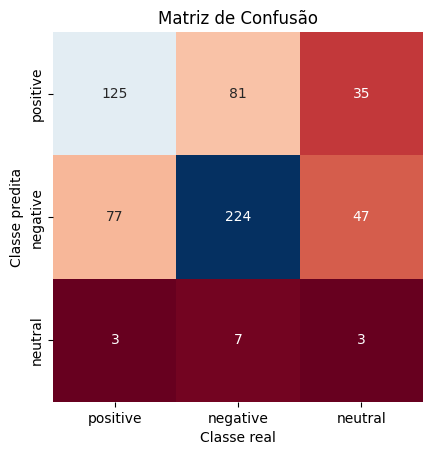

In [109]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo os rótulos únicos para a polaridade do sentimento, que serão usados nos eixos da matriz de confusão
sentiment_labels_pol = comentarios['sentiment_polarity'].unique()

# Calculando a matriz de confusão para avaliar a performance do classificador KNN para a polaridade do sentimento
# y_test_polarity: Rótulos reais dos dados de teste para a polaridade do sentimento
# predicoes_polarity: Rótulos previstos pelo classificador KNN para a polaridade do sentimento
# labels: Rótulos das classes para garantir que a matriz de confusão tenha as mesmas ordens de classes
cm = confusion_matrix(y_test_polarity, predicoes_polarity, labels=sentiment_labels_pol)

# Criando um gráfico da matriz de confusão usando seaborn
# annot=True: Adiciona anotações com os valores das células
# fmt='d': Formata os valores das anotações como inteiros
# cmap='RdBu': Define o mapa de cores para o gráfico
# cbar=False: Remove a barra de cores
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False, 
            xticklabels=sentiment_labels_pol,
            yticklabels=sentiment_labels_pol)

plt.xlabel("Classe real")    # Rótulo do eixo x
plt.ylabel("Classe predita") # Rótulo do eixo y
plt.title("Matriz de Confusão") # Título do gráfico
plt.show() # Exibindo o gráfico